In [19]:
import pandas as pd
import seaborn as sns

In [20]:
''' Read the file train.csv into Python and print a few rows. '''
df = pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='Count'>

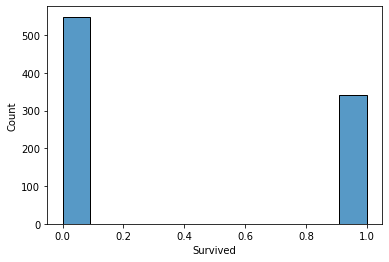

In [23]:
''' Calculate the number of surviving/non-surviving passengers and display it as a bar plot. '''
sns.histplot(data=df, x=df['Survived'])

In [5]:
''' Calculate the proportion of surviving 1st class passengers with
    regards to the total number of 1st class passengers.'''
df_Pclass_1 = df[df['Pclass'] == 1]
len(df_Pclass_1) / len(df['Pclass'])

0.24242424242424243

<AxesSubplot:xlabel='Sex', ylabel='Count'>

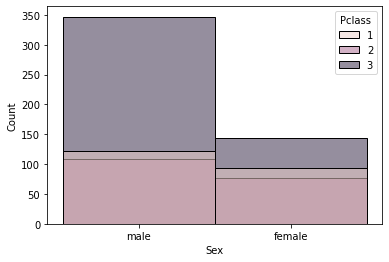

In [6]:
''' Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.'''
sns.histplot(data=df,x='Sex', hue='Pclass')

<AxesSubplot:xlabel='Age', ylabel='Count'>

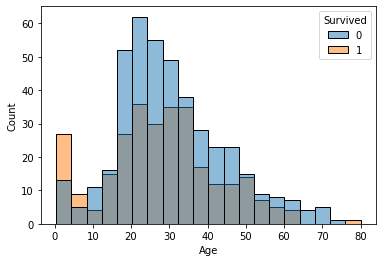

In [7]:
#Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.
sns.histplot(data=df,x='Age', hue='Survived')

In [8]:
# Calculate the average age for survived and drowned passengers separately.
print(df['Age'][df['Survived'] == 1].mean())
print(df['Age'][df['Survived'] == 0].mean())

28.343689655172415
30.62617924528302


In [9]:
# Replace missing age values by the mean age.
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [14]:
#Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.
dfg = df.groupby(by=['Pclass','Sex'])
dfg.agg('sum')

PassengerId  Survived          Age  SibSp  Parch       Fare
Pclass Sex                                                                
1      female        44106        91  3209.292059     52     43  9975.8250
       male          55599        45  4793.101471     38     34  8201.5875
2      female        33676        70  2184.898235     37     46  1669.7292
       male          48380        17  3310.622059     37     24  2132.1125
3      female        57561        72  3465.862941    129    115  2321.1086
       male         158064        47  9498.137059    173     78  4393.5865